# Clasificación

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import pylab

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', as_frame=False)

c:\Users\daniel.martinezcarre\AppData\Local\miniconda3\envs\ia\lib\site-packages\sklearn\datasets\_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
X, y = mnist['data'], mnist['target']

In [5]:
def plot_digit(image_data):
  image = image_data.reshape(28,28)
  plt.imshow(image, cmap="binary")
  plt.axis("off")

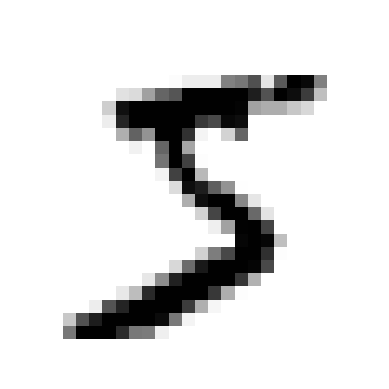

In [6]:
un_digito = X[0]
plot_digit(un_digito)

In [7]:
y = y.astype(int)
y[0]

5

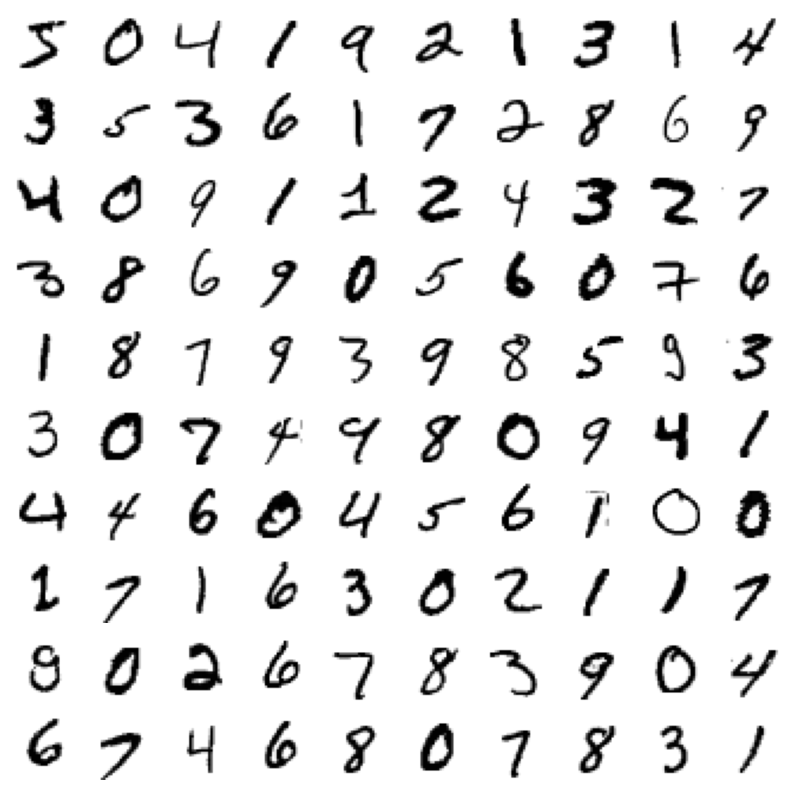

In [8]:
plt.figure(figsize=(10,10))
for i, image_data in enumerate(X[:100]):
  plt.subplot(10, 10, i+1)
  plot_digit(image_data)
plt.show()

In [9]:
# Los 60000 primeros para ENTRENAMIENTO, y los 60000 últimos para TEST
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

> Creación de sis si el número es un 5 (True), y si no lo es (False)

In [10]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

y_train_5

array([ True, False, False, ...,  True, False, False])

## Creación del modelo y entrenamiento 

In [11]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier()

# Lo entrenamos para que diferencie principalmente un número en específico, en este caso el 5.
sgd_clf.fit(X_train, y_train_5)

SGDClassifier()

In [12]:
# Se entrenó para predecir algún valor
un_digito = X[47]
sgd_clf.predict([un_digito])


array([ True])

### Realización de métricas

In [13]:
from sklearn.model_selection import cross_val_score

# Métrica accuracy: representa cuantas veces acerté de las muestras totales
# Validación cruzada
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.9588 , 0.95445, 0.9663 ])

### Creación de una modelo que te dice que no es un 5 independientemente del número que se le pase
Muestra que hay pocos 5

In [14]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
  def fit(self, X, y=None):
    return self
  def predict(self, X):
    return np.zeros((len(X), 1), dtype=bool)

In [15]:
n5_clf = Never5Classifier()
cross_val_score(n5_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.91125, 0.90855, 0.90915])

> El siguiente modelo realiza predicciones de una parte mientras las restante las entrena, despues las guarda apater y predice otra parte y entrena las restantes; sacando así al final, todas las predicciones

In [16]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

### Matriz de confusión
Compara los datos predichos con los reales para mostrar el margen de error entre ellos.
- 53033 verdaderos negativos
- 3818 verdaderos positivos

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_train_5, y_train_pred)
cm

array([[53070,  1509],
       [  789,  4632]], dtype=int64)

TP (Verdaderos Positicos) | TN (Verdaderos Negativos) | FP (Falsos Positivos) | FN (Falsos Negativos)
- **Precisión** ---> TP/(TP+FP) 
- **Recall** ---> TP/(TP+FN)

In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision_score(y_train_5, y_train_pred)

0.7542745481191988

In [19]:
recall_score(y_train_5, y_train_pred)

0.8544548976203652

In [20]:
f1_score(y_train_5, y_train_pred)

0.8012454592631033

In [21]:
un_digito = X[0]
y_scores = sgd_clf.decision_function([un_digito])
y_scores

array([797.85660736])

In [22]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [23]:
threshold = 5000
y_pred_new = (y_scores > threshold)

In [24]:
print(precision_score(y_train_5, y_pred_new))
print(recall_score(y_train_5, y_pred_new))


0.9499435453519006
0.46559675336653755


In [25]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

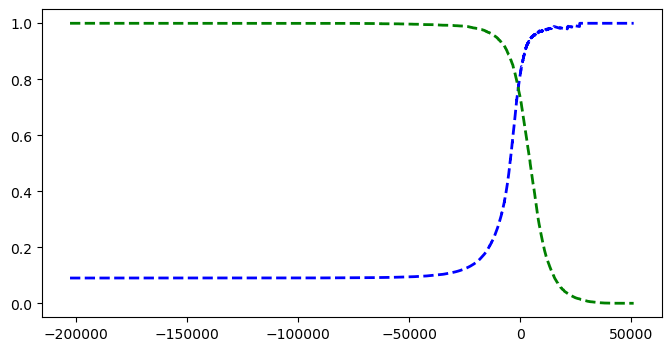

In [26]:
plt.figure(figsize=(8,4))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g--", label="Recall", linewidth=2)



Text(0, 0.5, 'Precision')

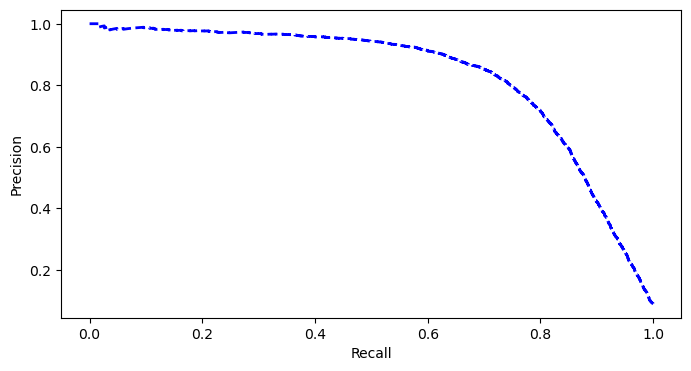

In [27]:
plt.figure(figsize=(8,4))
plt.plot(recalls, precisions, "b--", label="Precision/recall", linewidth=2)
plt.xlabel("Recall")
plt.ylabel("Precision")

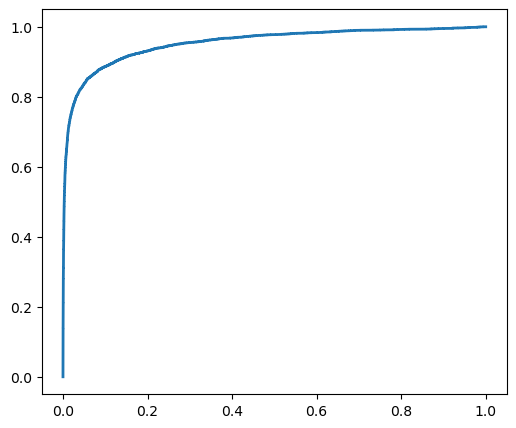

In [28]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)


plt.figure(figsize=(6, 5))  # extra code – not needed, just formatting
plt.plot(fpr, tpr, linewidth=2, label="ROC curve")

In [29]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9540770767612303

In [30]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier()
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")
y_probas_forest[:4]

array([[0.19, 0.81],
       [0.97, 0.03],
       [0.98, 0.02],
       [1.  , 0.  ]])

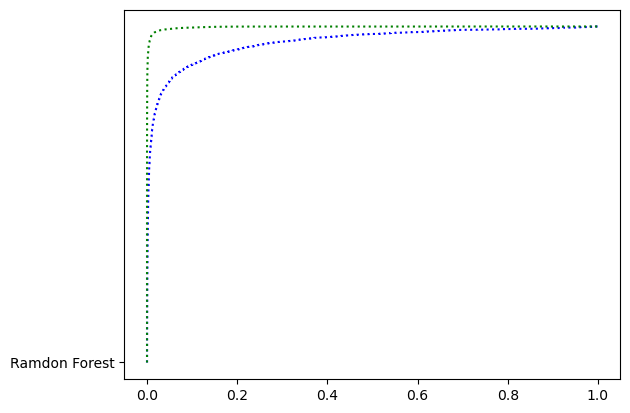

In [31]:
y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5, y_scores_forest)
plt.plot(fpr, tpr, "b:", label="SGD")
plt.plot(fpr_forest, tpr_forest, "g:", "Ramdon Forest")

In [32]:
y_train_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
print(roc_auc_score(y_train_5, y_scores_forest))
print(precision_score(y_train_5, y_train_forest))
print(recall_score(y_train_5, y_train_forest))

0.9983195884552523
0.9897015552753258
0.8686589190186312


In [33]:
un_digito = X[0]
from sklearn.svm import SVC

svc_clf = SVC()
svc_clf.fit(X_train[:2000], y_train[:2000])
print(svc_clf.predict([un_digito]))
un_digito_scores = svc_clf.decision_function([un_digito])
un_digito_scores.round(2)

[5]


array([[ 3.79,  0.73,  6.06,  8.3 , -0.29,  9.3 ,  1.75,  2.77,  7.21,
         4.82]])